In [1]:
import numpy as np
import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
root_path = '/content/drive/My Drive/NLP/Lab1/'

In [4]:
TrainDF = pd.read_parquet(root_path + 'train.parquet').reset_index()
TestDF = pd.read_parquet(root_path + 'test.parquet').reset_index()

In [5]:
TrainDF.head(10)

,Id,Body,Tags,Title,target
0,34862324,Algorithmm:\r\n\r\n**input :** Graph G\r\n\r\n...,<java><algorithm><graph-algorithm>,I am implementing a Minimum Spanning Forrest a...,2
1,47303682,"While converting the data frame to HTML, Date ...",<html><r><dataframe>,"R Studio: Date is getting converted to number,...",2
2,46431243,"<p>This should be an easy one, but somehow I c...",<python><pandas><dataframe><pandas-groupby>,Pandas - dataframe groupby - how to get sum of...,0
3,45306324,<p>Let say I have a component in Angular 2 tha...,<angular><typescript><rxjs>,Casting results from Observable.forkJoin to th...,0
4,49479547,<p>I'm setting a var using \n<code>set TEST_VA...,<c><windows><batch-file>,Environment variable set in batch file cannot ...,1
5,59665483,<p>I’m using uicollectionview in storyboard.</...,<swift><scroll><uicollectionview><uiscrollview...,How can i get how to scrolled it is in uicolle...,1
6,39300476,<p>When I compile my app with tsc I get this e...,<angular>,Angular2 TypeScript Directive error TS2345,0
7,37095617,<p>I’m using ubuntu 16.04 - 64 bit. I tried to...,<dpkg><staruml><ubuntu-16.04>,Can't install StarUML in Ubuntu 16.04,0
8,41727898,<p>For example: C:\Users\gabriel\Desktop\</p>\...,<c#><uwp>,How to set the path of the folder to be create...,1
9,46209672,<p>I want to ask about turn on gps in android ...,<android><gps><android-gps>,Turn on/off gps using button without getting i...,1


In [6]:
TestDF.head(10)

,Id,Body,Tags,Title
0,46785369,I was given a decision tree with sample data i...,<math><machine-learning><artificial-intelligen...,Desecion trees ended up with same given tree a...
1,38908667,<p>I am moving a test application over to Xcod...,<ios><swift><swift3><xcode8><nserror>,Value of type 'Error' has no member 'code'
2,44703012,<p>I would like to be able to perform linting ...,<jenkins><jenkins-pipeline>,How do I lint Jenkins pipelines from the comma...
3,34910435,"<p>I’m using <a href=""https://github.com/ftlab...",<javascript><css><mobile-safari><fastclick.js>...,Is there a way to prevent fastclick from firin...
4,51632121,I have some 5 Test cases and I want them to ke...,<android><testing><appium><katalon-studio>,How to loop test cases in katalon Studio?
5,51606103,<p>I would like to use TensorFlow Transform to...,<tensorflow><word2vec><apache-beam><tensorflow...,Converting tokens to word vectors effectively ...
6,40083517,<p>I am fetching options for the dropdown menu...,<javascript><html><css><select2>,"How to remove lag when using more than 50,000 ..."
7,46156990,i am using this xml file to create a page in a...,<java><android><xml>,Error on andriod xml layout
8,46216185,<p>I am trying to make a method which would ac...,<angular><typescript><loader><ngx-translate>,ngx-translate .instant returns key instead of ...
9,35176091,<p>I have created a GRPC Server in C# using th...,<c#><grpc>,How should a GRPC Service be hosted?


#EDA

In [7]:
print(TrainDF.info())
print(TestDF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48000 entries, 0 to 47999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      48000 non-null  int64 
 1   Body    48000 non-null  object
 2   Tags    48000 non-null  object
 3   Title   48000 non-null  object
 4   target  48000 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      12000 non-null  int64 
 1   Body    12000 non-null  object
 2   Tags    12000 non-null  object
 3   Title   12000 non-null  object
dtypes: int64(1), object(3)
memory usage: 375.1+ KB
None


In [8]:
import re
import matplotlib.pyplot as plt

In [9]:
# lets concat "Title" & "Body" & "Tags" columns and delete other columns
def col_preprocess(df, cols_to_del):
    df['text'] = df.Tags + " " + df.Title + " " + df.Body
    #df.drop(columns=cols_to_del, inplace=True)
    df['text'] = df['text'].str.lower()
    return df

In [10]:
# delete punct
def preprocess(whole_text):
    whole_text = re.sub(r'[^(a-zA-Z)\s]',' ', whole_text)
    whole_text = re.sub(' +', ' ', whole_text)
    return whole_text

In [11]:
TrainDF = col_preprocess(TrainDF, ['Body', 'Tags', 'Title'])
TrainDF['text'] = TrainDF['text'].apply(preprocess)

In [12]:
TrainDF.head(10)

,Id,Body,Tags,Title,target,text
0,34862324,Algorithmm:\r\n\r\n**input :** Graph G\r\n\r\n...,<java><algorithm><graph-algorithm>,I am implementing a Minimum Spanning Forrest a...,2,java algorithm graph algorithm i am implement...
1,47303682,"While converting the data frame to HTML, Date ...",<html><r><dataframe>,"R Studio: Date is getting converted to number,...",2,html r dataframe r studio date is getting con...
2,46431243,"<p>This should be an easy one, but somehow I c...",<python><pandas><dataframe><pandas-groupby>,Pandas - dataframe groupby - how to get sum of...,0,python pandas dataframe pandas groupby pandas...
3,45306324,<p>Let say I have a component in Angular 2 tha...,<angular><typescript><rxjs>,Casting results from Observable.forkJoin to th...,0,angular typescript rxjs casting results from ...
4,49479547,<p>I'm setting a var using \n<code>set TEST_VA...,<c><windows><batch-file>,Environment variable set in batch file cannot ...,1,c windows batch file environment variable set...
5,59665483,<p>I’m using uicollectionview in storyboard.</...,<swift><scroll><uicollectionview><uiscrollview...,How can i get how to scrolled it is in uicolle...,1,swift scroll uicollectionview uiscrollview ui...
6,39300476,<p>When I compile my app with tsc I get this e...,<angular>,Angular2 TypeScript Directive error TS2345,0,angular angular typescript directive error ts...
7,37095617,<p>I’m using ubuntu 16.04 - 64 bit. I tried to...,<dpkg><staruml><ubuntu-16.04>,Can't install StarUML in Ubuntu 16.04,0,dpkg staruml ubuntu can t install staruml in ...
8,41727898,<p>For example: C:\Users\gabriel\Desktop\</p>\...,<c#><uwp>,How to set the path of the folder to be create...,1,c uwp how to set the path of the folder to be...
9,46209672,<p>I want to ask about turn on gps in android ...,<android><gps><android-gps>,Turn on/off gps using button without getting i...,1,android gps android gps turn on off gps using...


In [13]:
TestDF = col_preprocess(TestDF, ['Body', 'Tags', 'Title'])
TestDF['text'] = TestDF['text'].apply(preprocess)

In [14]:
TestDF.head(10)

,Id,Body,Tags,Title,text
0,46785369,I was given a decision tree with sample data i...,<math><machine-learning><artificial-intelligen...,Desecion trees ended up with same given tree a...,math machine learning artificial intelligence...
1,38908667,<p>I am moving a test application over to Xcod...,<ios><swift><swift3><xcode8><nserror>,Value of type 'Error' has no member 'code',ios swift swift xcode nserror value of type e...
2,44703012,<p>I would like to be able to perform linting ...,<jenkins><jenkins-pipeline>,How do I lint Jenkins pipelines from the comma...,jenkins jenkins pipeline how do i lint jenkin...
3,34910435,"<p>I’m using <a href=""https://github.com/ftlab...",<javascript><css><mobile-safari><fastclick.js>...,Is there a way to prevent fastclick from firin...,javascript css mobile safari fastclick js fas...
4,51632121,I have some 5 Test cases and I want them to ke...,<android><testing><appium><katalon-studio>,How to loop test cases in katalon Studio?,android testing appium katalon studio how to ...
5,51606103,<p>I would like to use TensorFlow Transform to...,<tensorflow><word2vec><apache-beam><tensorflow...,Converting tokens to word vectors effectively ...,tensorflow word vec apache beam tensorflow tr...
6,40083517,<p>I am fetching options for the dropdown menu...,<javascript><html><css><select2>,"How to remove lag when using more than 50,000 ...",javascript html css select how to remove lag ...
7,46156990,i am using this xml file to create a page in a...,<java><android><xml>,Error on andriod xml layout,java android xml error on andriod xml layout ...
8,46216185,<p>I am trying to make a method which would ac...,<angular><typescript><loader><ngx-translate>,ngx-translate .instant returns key instead of ...,angular typescript loader ngx translate ngx t...
9,35176091,<p>I have created a GRPC Server in C# using th...,<c#><grpc>,How should a GRPC Service be hosted?,c grpc how should a grpc service be hosted p ...


In [15]:
def distribution_plot(df,col, set_type):
    labels = df[col].unique()
    data = df[col].value_counts()
    plt.xticks(range(len(data)), labels)
    plt.xlabel('Our labels')
    plt.ylabel('Count of elements')
    plt.title(f"Targer distribution for {set_type}")
    plt.bar(labels,data)
    plt.show()

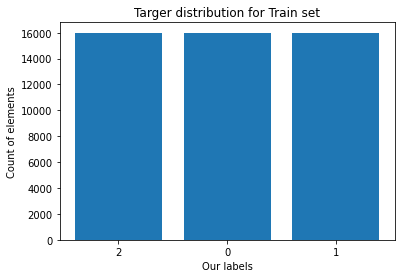

In [16]:
distribution_plot(TrainDF, 'target', 'Train set')

Прикольно, поровну))

In [17]:
from collections import Counter

In [18]:
TrainDF['Tags']

0                 <java><algorithm><graph-algorithm>
1                               <html><r><dataframe>
2        <python><pandas><dataframe><pandas-groupby>
3                        <angular><typescript><rxjs>
4                           <c><windows><batch-file>
                            ...                     
47995               <c#><asp.net><datetime><textbox>
47996                         <c#><image><detection>
47997       <java><apache-kafka><kafka-producer-api>
47998                                       <github>
47999                <ios><objective-c><uitableview>
Name: Tags, Length: 48000, dtype: object

In [19]:
tagsCount = []

In [20]:
def clear_tag(tags):
    return tags.replace('><', '> <').replace('>','').replace('<','')
    # print(tag2count)
    # for tag in tags:
    #     if tag in tag2count.keys():
    #         tag2count[tag] += 1
    #     else:
    #         tag2count[tag] = 1

In [21]:
top_tags = TrainDF['Tags'].apply(lambda x: clear_tag(x)).str.split(expand=True).stack().value_counts()
top_tags

javascript            5638
python                5480
java                  5031
android               3880
php                   3355
                      ... 
type-theory              1
skype-for-business       1
edit-distance            1
aws-php-sdk              1
expandablelistview       1
Length: 9619, dtype: int64

In [22]:
top_tags.values

array([5638, 5480, 5031, ...,    1,    1,    1])

In [23]:
top_tags.keys()

Index(['javascript', 'python', 'java', 'android', 'php', 'c#', 'html', 'c++',
       'css', 'arrays',
       ...
       'interopservices', 'dbvisualizer', 'gprof', 'sealed-class',
       'visual-c++-2012', 'type-theory', 'skype-for-business', 'edit-distance',
       'aws-php-sdk', 'expandablelistview'],
      dtype='object', length=9619)

In [24]:
def top_bar(labels, x, name):
    plt.figure(figsize=(20,7))
    plt.xticks(range(len(x)), labels)
    plt.xlabel('Our labels')
    plt.ylabel('Count of elements')
    plt.title(f"Targer distribution for {name}")
    plt.bar(labels,x)
    plt.show()

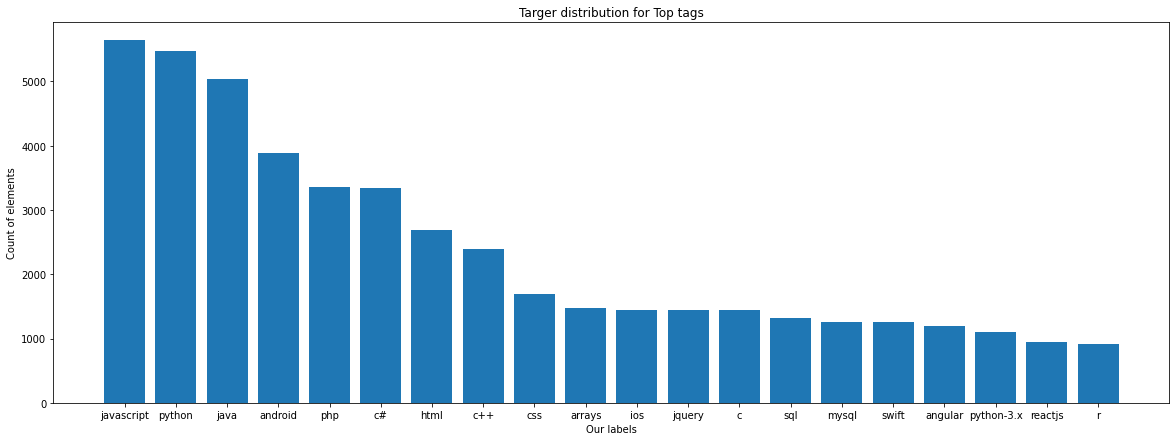

In [25]:
top_bar(top_tags[:20].keys(), top_tags[:20].values, 'Top tags')

In [26]:
print(TrainDF['Body'].loc[0])
print(TrainDF['Body'].loc[1])
print(TrainDF['Body'].loc[2])
print(TrainDF['Body'].loc[3])
print(TrainDF['Body'].loc[4])

Algorithmm:

**input :** Graph G

**output:** Set of MSTs T

**begin**

T=null;
E=G.Edges;

for all vertices in G,
Create a tree t having single vertex b

add t to T

end for

     repeat
        Find an edge e ∈ E having minimum weight
        such that one end belongs to t ∈ T and the other
        end does not belongs to any of the trees in T
        Add e to t
      until e = NULL

I'm stuck on the logic for the highlighted block.
I've used simple objects for vertex,edge and tree. And for their sets, used array of Objects.



While converting the data frame to HTML, Date is getting converted to a number. 

How to keep it date only?
<p>This should be an easy one, but somehow I couldn't find a solution that works.</p>

<p>I have a pandas dataframe which looks like this:</p>

<pre><code>index col1   col2   col3   col4   col5
0     a      c      1      2      f 
1     a      c      1      2      f
2     a      d      1      2      f
3     b      d      1      2      g
4     b      e   

In [27]:
#<code></code><p></p><pre></pre>
#Add it in stop list

Как по мне теги из самого стака дадут большой шум. Хотя и прозвучало на паре, что не надо этого делать, я всё таки уберу. Это не комерц проект и не соревнование, поэтому больше для души спокойствие это было сделано, чем для погони за акюраси

In [28]:
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize   
from nltk.stem import WordNetLemmatizer 

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
def preprocess_sentence(sentence, remove_not_words=False):
    sentence = sentence.lower()
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english') + ['pre', 'code', 'p', 'col', 'g', 'b', 'e', 'f', '(', ')'])#['<code>','</code>','<p>','</p>','<pre>','</pre>'])
    word_tokens = word_tokenize(sentence)
    filtered_sentence = ' '.join([lemmatizer.lemmatize(w) for w in word_tokens if w not in stop_words and (w.isalpha() or w.isnumeric())])
    return filtered_sentence

In [30]:
TrainDF['text_pre'] = TrainDF['text'].apply(lambda x: preprocess_sentence(x))

In [31]:
TrainDF['text'].loc[2]

' python pandas dataframe pandas groupby pandas dataframe groupby how to get sum of multiple columns p this should be an easy one but somehow i couldn t find a solution that works p \n\n p i have a pandas dataframe which looks like this p \n\n pre code index col col col col col \n a c f \n a c f\n a d f\n b d g\n b e g\n b e g\n code pre \n\n p strong i want to group by col and col and get the code sum() code of col and col strong code col code can be dropped since the data can not be aggregated p \n\n p here is how the output should look like i am interested in having both code col code and code col code in the resulting dataframe it doesn t really matter if code col code and code col code are part of the index or not p \n\n pre code index col col col col \n a c \n a d \n b d \n b e \n code pre \n\n p here is what i tried p \n\n pre code df new df groupby( col col ) col col sum()\n code pre \n\n p that however only returns the aggregated results of code col code p \n\n p i am lost her

In [32]:
TrainDF['text_pre'].loc[2]

'python panda dataframe panda groupby panda dataframe groupby get sum multiple column easy one somehow find solution work panda dataframe look like index c c strong want group get sum strong dropped since data aggregated output look like interested resulting dataframe really matter part index index c tried df new df groupby sum however return aggregated result lost every example found aggregate one column issue obviously occur'

In [33]:
token_counts = Counter(item for token in TrainDF['text_pre']
                            for item in token.split())

In [34]:
token_counts

Counter({'java': 25697,
         'algorithm': 991,
         'graph': 823,
         'implementing': 253,
         'minimum': 317,
         'spanning': 7,
         'forrest': 3,
         'algorihm': 2,
         'stuck': 629,
         'write': 4162,
         'loop': 4627,
         'algorithmm': 1,
         'input': 11998,
         'output': 6721,
         'set': 8786,
         'mst': 7,
         'begin': 1288,
         'null': 8321,
         'edge': 422,
         'vertex': 254,
         'create': 7635,
         'tree': 999,
         'single': 1959,
         'add': 9268,
         'end': 5844,
         'repeat': 546,
         'find': 7174,
         'weight': 979,
         'one': 10549,
         'belongs': 85,
         'logic': 668,
         'highlighted': 72,
         'block': 1734,
         'used': 3746,
         'simple': 3016,
         'object': 10188,
         'array': 15201,
         'html': 12506,
         'r': 11766,
         'dataframe': 1336,
         'studio': 4102,
         'date

In [35]:
print("Total unique tokens :", len(token_counts))
print('\n'.join(map(str, token_counts.most_common(n=5))))
print('...')
print('\n'.join(map(str, token_counts.most_common()[-3:])))

Total unique tokens : 139746
('gt', 70978)
('lt', 67223)
('android', 32381)
('c', 31308)
('string', 29330)
...
('datebox', 1)
('bujt', 1)
('nscfarray', 1)


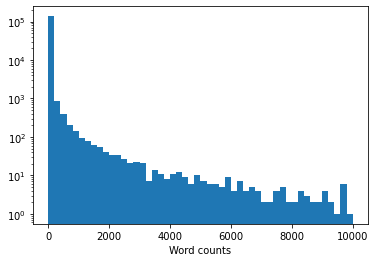

In [36]:
plt.hist(list(token_counts.values()), range=[0, 10**4], bins=50, log=True)
plt.xlabel("Word counts");

~~Скатились~~ Видно что у нас ненормально часто есть слово gt, а все остальные по убванию. Воббще ничего особо криминального не видно, ведь даже в топе есть такие слова как string - часто используемое везде или android(что кстати слегка удивительно, но не сильно)

In [70]:
from wordcloud import WordCloud

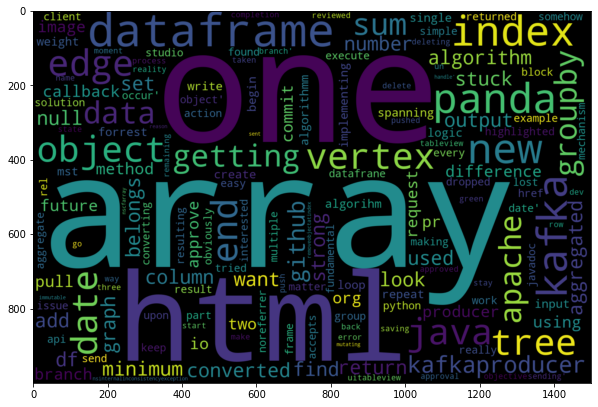

In [79]:
wordcloud = WordCloud(max_words=800, width=1500, height=1000).generate(str(TrainDF['text_pre'].values))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')

Сложно как-то откоментить. По сути часто встречаемые слова это теги. И не удивительно, ведь часто - это язык или зарезервированное слово, которое не раз повториться в вопросе

In [37]:
#TrainDF['text_pre'] = TrainDF['text_pre'].apply(lambda x: x.split())

#Embeddings

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from gensim.models import Word2Vec, FastText, KeyedVectors
import gensim.downloader as api

In [39]:
def Col2Vec(corpus, model):    
    
    def get_vector(sentence):   
        word_tokens = word_tokenize(sentence)
        vector = 0
        for w in word_tokens:
            try: 
                vector += model.wv[w]
            except:
                continue
        return vector
    
    out_corpus = np.stack(corpus.apply(lambda x: get_vector(x)).to_numpy())
    
    return out_corpus

In [40]:
all_words = [row.split() for row in TrainDF['text_pre']]
vocab = token_counts.keys()

In [41]:
def get_vec_by_model(model):
    model.build_vocab(sentences=all_words)
    model.train(sentences=all_words, total_examples=len(all_words), epochs=10)
    vectors = Col2Vec(TrainDF['text_pre'], model)
    return vectors

In [42]:
def get_vec_by_pretrained_model(path):
    model = KeyedVectors.load_word2vec_format(path, binary=True, unicode_errors='ignore')
    vectors = Col2Vec(TrainDF['text_pre'], model)
    return vectors

In [43]:
def get_vector_by_vectorizing(model):
    m = model(stop_words='english', ngram_range=(1, 3), max_df=0.7, min_df=2, max_features=20, vocabulary=vocab)
    vectors = m.fit_transform(TrainDF['text_pre'])
    return vectors

##One hot enconding

![](https://docs.google.com/uc?export=download&id=1b09La3UVleiUzjzLQMauRKS-XmDlrYTs)

## CountVectorizer

In [45]:
#Not today
cv_vectors = get_vector_by_vectorizing(CountVectorizer)
cv_vectors

<48000x139746 sparse matrix of type '<class 'numpy.int64'>'
	with 1921312 stored elements in Compressed Sparse Row format>

##Word2Vec

In [46]:
model = Word2Vec(size=100, min_count=1, window=5)

In [47]:
w2v_vectors = get_vec_by_model(model)
w2v_vectors

array([[  7.1376076,  48.54426  , -12.003044 , ...,  32.290787 ,
        -11.708337 ,  30.28376  ],
       [ 14.47933  ,  24.015919 ,   5.224821 , ..., -17.136074 ,
         -5.6438212,  42.89662  ],
       [ 24.107676 ,  57.501682 ,  49.888012 , ...,   2.3741252,
        -39.96502  , 116.08019  ],
       ...,
       [-59.025826 ,  25.325167 ,  -3.7492228, ..., -21.042334 ,
        -41.143394 ,  21.568207 ],
       [-66.72146  ,  44.521908 ,  18.32441  , ...,  15.042658 ,
        -34.067802 ,  11.32097  ],
       [  2.1643062,  27.011189 ,  10.711536 , ...,  -8.638143 ,
         -8.215428 ,  44.71379  ]], dtype=float32)

##Word2Vec | pretrained

In [48]:
path = api.load("word2vec-google-news-300", return_path=True)
print(path)

[=================================================-] 98.1% 1631.8/1662.8MB downloaded
/root/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz


In [49]:
w2v_vectors_pre = get_vec_by_pretrained_model(path)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


##FastText

In [50]:
model = FastText(size=100, window=5, min_count=5)

In [51]:
ft_vectors = get_vec_by_model(model)
ft_vectors

array([[-30.375221 ,   2.5654917,  33.744797 , ...,  51.684883 ,
        -17.636414 , -67.64316  ],
       [  7.1743193, -26.577473 ,  28.596203 , ...,  -6.1835437,
         31.64993  , -31.614304 ],
       [-36.556747 ,  -1.4479713,  45.254883 , ..., -26.43714  ,
         50.863503 , -35.19106  ],
       ...,
       [-15.069512 , -32.76452  ,   6.456203 , ..., -15.856091 ,
         38.389076 , -12.577621 ],
       [-18.847984 , -37.385662 , -41.03434  , ...,  25.623075 ,
         -1.3894817, -25.218323 ],
       [  7.25688  ,  -1.4921389,  23.671034 , ...,  -1.7205235,
        -18.70706  , -19.151684 ]], dtype=float32)

##FastText | pretrained

In [52]:
path = api.load("fasttext-wiki-news-subwords-300", return_path=True)
print(path)

[=================================================-] 99.3% 952.0/958.4MB downloaded
/root/gensim-data/fasttext-wiki-news-subwords-300/fasttext-wiki-news-subwords-300.gz


In [53]:
path

'/root/gensim-data/fasttext-wiki-news-subwords-300/fasttext-wiki-news-subwords-300.gz'

In [54]:
ft_vectors_pre = get_vec_by_pretrained_model(path)
ft_vectors_pre

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


ValueError: ignored

Он работал но сломался((((( Мне уже лень чинить

##TfiDF

In [44]:
tfidf_vectors = get_vector_by_vectorizing(TfidfVectorizer)
tfidf_vectors

<48000x139746 sparse matrix of type '<class 'numpy.float64'>'
	with 1921312 stored elements in Compressed Sparse Row format>

#Classical algorithms

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import LatentDirichletAllocation, PCA

In [51]:
!pip install catboost

In [52]:
from catboost import CatBoostClassifier

In [46]:
y = TrainDF['target']

In [47]:
embeddings = {'cv' : (train_test_split(cv_vectors, y, test_size=0.3, random_state=666)),
              'w2v':            (train_test_split(w2v_vectors, y, test_size=0.3, random_state=666)),
              'w2v_pre' : (train_test_split(w2v_vectors_pre, y, test_size=0.3, random_state=666)),
              'ft':            (train_test_split(ft_vectors, y, test_size=0.3, random_state=666)),
#              'ft_pre': (train_test_split(ft_vectors_pre, y, test_size=0.3, random_state=666)),
              'tfidf': (train_test_split(tfidf_vectors, y, test_size=0.3, random_state=666)),
              } 

NameError: ignored

In [90]:
classifiers = {'logreg': LogisticRegression(max_iter=1000),
               'svm' : SVC(),          
               'random_forest': RandomForestClassifier(),
               'decision_tree': DecisionTreeClassifier(),
               'ada_boost': AdaBoostClassifier(),
               'cat_boost': CatBoostClassifier(verbose=False)}

![](https://docs.google.com/uc?export=download&id=1OKb-CrEZ9onOMhEGqxvD3UI6GMhBUMfm)

In [ ]:
for name_model, model in classifiers.items():
    for name_emb, emb in embeddings.items():
        model.fit(emb[0], emb[2])
        test_accuracy = accuracy_score(emb[3], model.predict(emb[1]))
        print('Это был:', name_model, ' c ', name_emb, ' и точностью: ', test_accuracy)

Это был: logreg  c  cv  и точностью:  0.7317361111111111
Это был: logreg  c  w2v  и точностью:  0.6778472222222223
Это был: logreg  c  w2v_pre  и точностью:  0.6428472222222222
Это был: logreg  c  ft  и точностью:  0.6765972222222222
Это был: logreg  c  ft_pre  и точностью:  0.6428472222222222
Это был: logreg  c  tfidf  и точностью:  0.7484027777777778
Это был: svm  c  cv  и точностью:  0.7341666666666666
Это был: svm  c  w2v  и точностью:  0.6975
Это был: svm  c  w2v_pre  и точностью:  0.6547222222222222
Это был: svm  c  ft  и точностью:  0.6934722222222223
Это был: svm  c  ft_pre  и точностью:  0.6547222222222222
Это был: svm  c  tfidf  и точностью:  0.7486805555555556
Это был: random_forest  c  cv  и точностью:  0.7289583333333334
Это был: random_forest  c  w2v  и точностью:  0.67375
Это был: random_forest  c  w2v_pre  и точностью:  0.6086805555555556
Это был: random_forest  c  ft  и точностью:  0.6747222222222222
Это был: random_forest  c  ft_pre  и точностью:  0.6013888888888889
Э

![picture](https://docs.google.com/uc?export=download&id=1UAPEdUzKd5uJ7vB-y4y01fov98z6yXTF)

И так, я проснулся и можно порассуждать. Ну во первых у нас есть небольшой топ решений.


1.   cat_boost + tfidf
2.   cat_boost + cv
3.   svm + tfidf
4.   logreg + tfidf
5.   svm + cv

Ага, вот и видим два ярких тренда. Первое, катбуст и свм явно выбились в лидеры. Второе, они сделали это на cv и tfidf. В принципе, результаты все равно не айс. Лучший алгоритм дает всего лишь 76% точности. Попробуем перебрать грид серчем cat_boost, svm, logreg.


In [ ]:
embeddings = {'cv' : (train_test_split(cv_vectors, y, test_size=0.3, random_state=666)),
              'tfidf': (train_test_split(tfidf_vectors, y, test_size=0.3, random_state=666)),
              } 

In [ ]:
classifiers = {'logreg': LogisticRegression(max_iter=1000),
               'svm' : SVC(),
               }

In [ ]:
parameters = {'svm' : {'kernel' : ['linear', 'poly', 'sigmoid'],
                       'random_state' : [66]},
              'logreg' : {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
                                    'random_state' : [66]},
              }

In [ ]:
best_classifiers = {'svm' : [],
                    'logreg': [],}

In [ ]:
for clf_name, clf in classifiers.items():
    for emb_name, embedding in embeddings.items():
        best_clf = GridSearchCV(clf, param_grid=parameters[clf_name], n_jobs=-1)
        best_clf.fit(embedding[0], embedding[2])
        best_classifiers[clf_name].append(best_clf)
        print(f'Best train accuracy: {accuracy_score(embedding[2], best_clf.predict(embedding[0]))}')
        print(f'Train classification report: {classification_report(embedding[2], best_clf.predict(embedding[0]))}')
        print(f'Best test accuracy: {accuracy_score(embedding[3], best_clf.predict(embedding[1]))}')
        print(f'Test classification report: {classification_report(embedding[3], best_clf.predict(embedding[1]))}')

Best train accuracy: 0.9757440476190476
Train classification report:               precision    recall  f1-score   support

           0       0.99      0.99      0.99     11195
           1       0.96      0.97      0.97     11205
           2       0.97      0.97      0.97     11200

    accuracy                           0.98     33600
   macro avg       0.98      0.98      0.98     33600
weighted avg       0.98      0.98      0.98     33600

Best test accuracy: 0.7317361111111111
Test classification report:               precision    recall  f1-score   support

           0       0.82      0.82      0.82      4805
           1       0.66      0.69      0.68      4795
           2       0.71      0.68      0.70      4800

    accuracy                           0.73     14400
   macro avg       0.73      0.73      0.73     14400
weighted avg       0.73      0.73      0.73     14400

Best train accuracy: 0.8582738095238095
Train classification report:               precision    recall

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best train accuracy: 0.9829166666666667
Train classification report:               precision    recall  f1-score   support

           0       1.00      0.99      0.99     11195
           1       0.97      0.98      0.98     11205
           2       0.98      0.97      0.98     11200

    accuracy                           0.98     33600
   macro avg       0.98      0.98      0.98     33600
weighted avg       0.98      0.98      0.98     33600

Best test accuracy: 0.7040972222222223
Test classification report:               precision    recall  f1-score   support

           0       0.76      0.81      0.79      4805
           1       0.64      0.67      0.65      4795
           2       0.71      0.63      0.67      4800

    accuracy                           0.70     14400
   macro avg       0.70      0.70      0.70     14400
weighted avg       0.70      0.70      0.70     14400



![picture](https://docs.google.com/uc?export=download&id=1vfqA68ZC2voNLv-jZ-HkQynBEKdP8I-V)

Так долго, что я успел поработать, поспать, поработать ииииииииииииииииииииииииии ОН НЕЗАКОНЧИЛ КРУТИТЬСЯ!

In [ ]:
grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

model = CatBoostClassifier()

grid_search_result = model.grid_search(grid, 
                                       X=embeddings['tfidf'][0], 
                                       y=embeddings['tfidf'][2], 
                                       plot=True)

Тут что-то отключается постоянно

#Neural networks

In [57]:
import numpy as np
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Input, Embedding, Conv1D, GlobalMaxPool1D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [59]:
import keras
import keras.layers as L
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential

In [78]:
sentences = TrainDF['text_pre'].values
y = TrainDF['target'].values

sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, 
                                                                    y, 
                                                                    test_size=0.3, 
                                                                    random_state=666)

max_features = 30000
maxlen = 300
embed_size = 512

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(sentences_train)

X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer.word_index) + 1

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [81]:
model = Sequential()
model.add(L.Embedding(input_dim=max_features, 
                      output_dim=embed_size, 
                      input_length=maxlen))

model.add(L.Conv1D(256, 5, activation='relu'))
model.add(L.Conv1D(128, 5, activation='sigmoid'))
model.add(L.Conv1D(64, 5, activation='relu'))
model.add(L.Conv1D(32, 5, activation='sigmoid'))
model.add(L.Conv1D(16, 5, activation='relu'))
model.add(L.GlobalMaxPooling1D())
model.add(L.Flatten())
model.add(L.Dense(3))
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 300, 512)          15360000  
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 296, 256)          655616    
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 292, 128)          163968    
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 288, 64)           41024     
_________________________________________________________________
conv1d_20 (Conv1D)           (None, 284, 32)           10272     
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 280, 16)           2576      
_________________________________________________________________
global_max_pooling1d_7 (Glob (None, 16)               

In [82]:
history = model.fit(X_train, y_train,
                        epochs=5,
                        steps_per_epoch=100,
                        verbose=True,
                        validation_data=(X_test, y_test),
                        batch_size=256)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: ", accuracy)
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy: ", accuracy)

Epoch 1/5
100/100 [==============================] - 32s 319ms/step - loss: 0.5458 - accuracy: 0.3132 - val_loss: 0.4285 - val_accuracy: 0.2783
Epoch 2/5
100/100 [==============================] - 32s 318ms/step - loss: 0.3689 - accuracy: 0.3135 - val_loss: 0.4061 - val_accuracy: 0.2818
Epoch 3/5
100/100 [==============================] - 32s 318ms/step - loss: 0.3079 - accuracy: 0.3094 - val_loss: 0.3879 - val_accuracy: 0.2881
Epoch 4/5
100/100 [==============================] - 32s 319ms/step - loss: 0.2537 - accuracy: 0.3062 - val_loss: 0.3765 - val_accuracy: 0.3325
Epoch 5/5
100/100 [==============================] - 32s 319ms/step - loss: 0.1919 - accuracy: 0.3341 - val_loss: 0.3593 - val_accuracy: 0.3703
Training Accuracy:  0.37809523940086365
Testing Accuracy:  0.3703472316265106


ПЕребробовав кучу ноутбуков, гадов и прочей херни понял я одно - надо подтягивать преобразование данных:) Так как именно из-за этого не могли долго нейронку завели, а когда завели.... Лучше бы не заводили
Вообще мы накидывали слоев, меня параметры, но что-то всё грустно. Даже не близко к стандартным алгосам
![picture](https://docs.google.com/uc?export=download&id=15lU-5QYq6PCLdxpJc4vsOkss3Lm2iRe7)

#Test

И так, идеальный вариант это -

In [47]:
TestDF = col_preprocess(TestDF, ['Body', 'Tags', 'Title'])
TestDF['text'] = TestDF['text'].apply(preprocess)

In [48]:
TestDF['text_pre'] = TestDF['text'].apply(lambda x: preprocess_sentence(x))

In [49]:
all_words = [row.split() for row in TrainDF['text_pre']]
vocab = token_counts.keys()

In [50]:
model = TfidfVectorizer(stop_words='english', ngram_range=(1, 3), max_df=0.7, min_df=2, max_features=20, vocabulary=vocab)
vectors = model.fit_transform(TestDF['text_pre'])

In [51]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_vectors, y, test_size=0.3, random_state=666)

In [52]:
m = LogisticRegression(max_iter=1000).fit(X_train, y_train)

In [65]:
test_accuracy = accuracy_score(y_test, m.predict(X_test))
print('Это был: LogisticRegression и точностью: ', test_accuracy)

Это был: LogisticRegression и точностью:  0.7484027777777778


In [53]:
TestDF['Predicted'] = m.predict(vectors)

In [59]:
TestDF.drop(['Tags', 'text', 'Body', 'Title', 'test_pre'], axis=1, inplace=True)
TestDF.to_csv(root_path + "test.csv")
TestDF.head(10)

,Id,Predicted
0,46785369,2
1,38908667,0
2,44703012,0
3,34910435,0
4,51632121,2


Остановился на топ-4 потому что свм учиться ВЕЧНОСТЬ, а катбуст падал, падал и ещё он падал.

# END

Ну наши любимые выводы)))

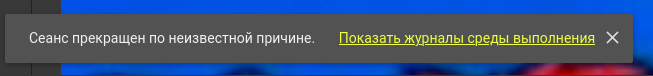

Эта надпись стала моей любимой. В последние дни я так часто её стал видеть, что подумал, что это знак сверху бросить всё и уехать в Сибирь. Но это всё лирика.
Тексты на стаке это не обычные тексты. Их почти не недо предобрабатывать, так как очень много кода встречается среди него. Убрать его весь не представляется возможным. Да и пользы от этой операции я не думаю, что будет много. Осложняет всё ещё обромление вопрос в html теги. Мы остановились на варианте убрать их, хотя стоит заметить, что не прогоняли полный список алгосов без них. Что-то вроже Лога и Свм были задейчстваны для сравнения.

Вообще подойдя к выполнению этой лабы за неделю(что никогда такого не было) можно сказать, что мы не успели. И это шок конечно. На лабы по иаду у меня уходила два полных дня, а тут. Это конечно из-за продолжительности алгосов. Без грид серча пробег по всем стандартным занимал ночь. А он же и упасть может за это время. Вообще без собственных тредрипперов и rtx 3090 тяжеловато выполнять такие задачи.

Но определенные успехи достигнуты всё же были. Был сделан EDA, ебаэдинг(хотя ft_pred перестал запускаться почему-то), классические алгосы были почти дожаты до максимума. Гридсерчь не посчитавшийся за ночь это жестко конечно, но какие-то резы он выдал. После более менее нормального пошло хуже. Катбуст просто падал при попытки сделать его на тесте. Нейронку вроде и лекцию пересмотрели, и в инете почитали, аели ели завели ииии... это было разочарованием в плане точности.

По работе оставленно скудное количество комментариев, так как я считаю больше надо итог обсуждать) Оставлять коментарии по тиу "этот массив перебирает все элементы...", мне кажется, излишне. В ЕДА тоже не вот есть что поанализировать можно было. Как-то после таблиц с условно 20 столбцами работать с текстом не привычно. 

Общие впечатления: получилось интересно, но муторно на многих шагах с обучением. К следующей лабе надо будет приступать сразу после выдачи её.

![picture](https://docs.google.com/uc?export=download&id=1oQkeYhzvuuporAUe4NJ55Ngd0U9L62jU)